# Reporte de Analítica

## Importar modulos

In [6]:
import h5py
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Recopilación de los datos

## Recopilar datos
Usar Kaggle API para obtener el dataset

In [18]:
!kaggle datasets download marianarfranklin/mexico-covid19-clinical-data

Dataset URL: https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data
License(s): CC0-1.0
mexico-covid19-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


## Organizar y almacenar
Descomprimir archivo zip y guardar el archivo csv

In [19]:
with zipfile.ZipFile('mexico-covid19-clinical-data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

## Preprocesamiento
Limpieza de datos

In [29]:
df = pd.read_csv('mexico_covid19.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   263007 non-null  int64  
 1   FECHA_ARCHIVO        263007 non-null  object 
 2   ID_REGISTRO          263007 non-null  object 
 3   ENTIDAD_UM           263007 non-null  int64  
 4   ENTIDAD_RES          263007 non-null  int64  
 5   RESULTADO            263007 non-null  int64  
 6   DELAY                263007 non-null  int64  
 7   ENTIDAD_REGISTRO     263007 non-null  int64  
 8   ENTIDAD              263007 non-null  object 
 9   ABR_ENT              263007 non-null  object 
 10  FECHA_ACTUALIZACION  263007 non-null  object 
 11  ORIGEN               263007 non-null  int64  
 12  SECTOR               263007 non-null  int64  
 13  SEXO                 263007 non-null  int64  
 14  ENTIDAD_NAC          263007 non-null  int64  
 15  MUNICIPIO_RES    

### Remover columnas innecesarias

In [422]:
df_clean = df.drop(columns = ['id', 'ID_REGISTRO', 'DELAY'], inplace=False)
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


### Convertir atributos de tipo objeto a tipo datetime

In [423]:
# The attributes in the list are object type, so we convert each into a datetime type attribute
# FECHA_DEF cannot be coverted into datetime format becasue 9999-99-99 ins't a valid a date, so we replace it with 2200-01-01 which is  valir format and still is outlier.
df_clean['FECHA_DEF'] = df_clean['FECHA_DEF'].replace('9999-99-99', '2200-01-01')


# The attributes in the following list are object type, so we convert each into a datetime type attribute
tipos_de_fechas = ['FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF']
for tipo_de_fecha in tipos_de_fechas:
    df_clean[tipo_de_fecha] = pd.to_datetime(df_clean[tipo_de_fecha])

In [424]:
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


In [425]:
df_clean['EMBARAZO'].value_counts()

97    134310
2     126077
1       2064
98       556
Name: EMBARAZO, dtype: int64

# EDA - Análisis Exploratorio de los datos

## Resumen estadística
Calcular estadística descriptiva -> promedio, media, desviación estándar, mínimo, máximo, percentiles, etc.

In [426]:
df_clean.describe()

,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263001.000000,263007.000000,...,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,14.844601,15.127719,1.609672,15.092271,1.635789,9.601680,1.510682,19.691004,36.441401,1.236378,...,2.359667,2.174185,2.453961,2.324980,2.184763,2.320231,2.268217,32.283764,98.593680,74.541012
std,8.001043,7.904314,0.487825,7.915406,0.481209,7.265468,0.499887,19.378113,48.117024,0.424858,...,6.021830,5.745114,6.850231,5.796086,5.817362,5.722995,5.867586,45.350310,6.275497,40.384991
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,9.000000,1.000000,9.000000,1.000000,4.000000,1.000000,9.000000,7.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
50%,14.000000,15.000000,2.000000,15.000000,2.000000,12.000000,2.000000,15.000000,19.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,21.000000,21.000000,2.000000,21.000000,2.000000,12.000000,2.000000,24.000000,48.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,99.000000,97.000000
max,32.000000,32.000000,2.000000,32.000000,2.000000,99.000000,2.000000,99.000000,999.000000,2.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000


## Visualización de los datos
Usar técnicas de visualización como histogramas, gráficas de dispresión, gráficas de barras, diagramas de cajas, entre otros.

In [427]:
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


### Sector de salud

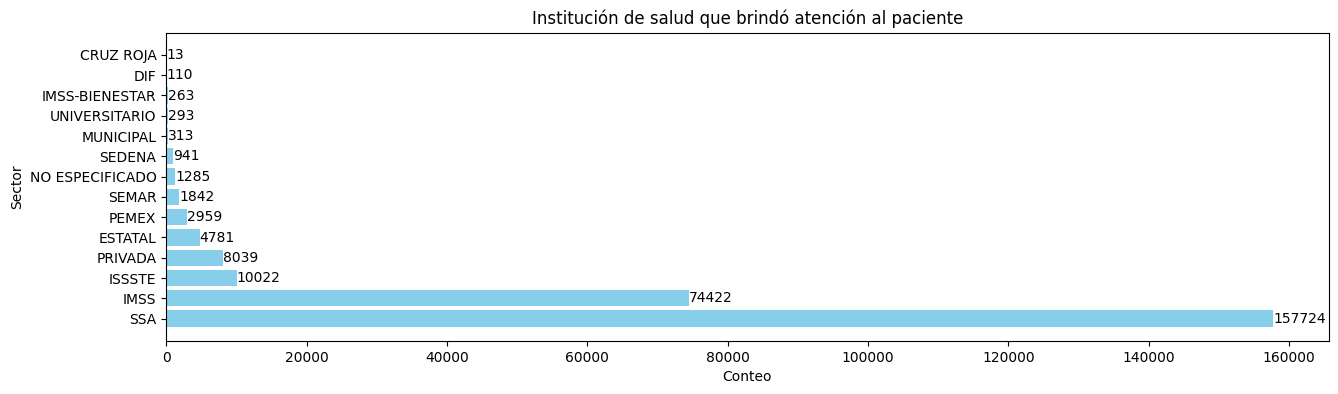

In [475]:
SECTOR = {
    1: "CRUZ ROJA",
    2: "DIF",
    3: "ESTATAL",
    4: "IMSS",
    5: "IMSS-BIENESTAR",
    6: "ISSSTE",
    7: "MUNICIPAL",
    8: "PEMEX",
    9: "PRIVADA",
    10: "SEDENA",
    11: "SEMAR",
    12: "SSA",
    13: "UNIVERSITARIO",
    99: "NO ESPECIFICADO"
}
sector_value_counts = pd.Series([SECTOR[item] for item in df_clean['SECTOR']]).value_counts()


# Using value_counts
value_counts = sector_value_counts

# Extracting keys (unique values) and values (counts)
keys = value_counts.index.tolist()
values = value_counts.values.tolist()

# Creating the horizontal bar plot
plt.figure(figsize=(15, 4))
bars = plt.barh(keys, values, color='skyblue')

# Adding labels next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

# Adding title and labels
plt.title('Institución de salud que brindó atención al paciente')
plt.xlabel('Conteo')
plt.ylabel('Sector')

# Display the plot
plt.show()

### Sexo paciente

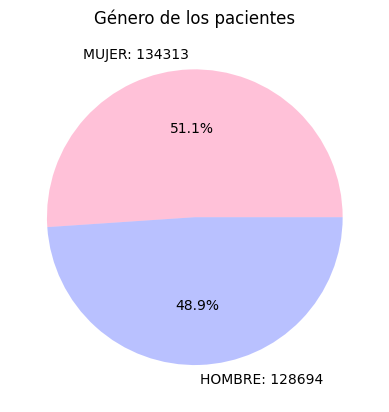

In [495]:
SEXO = {
    1: "MUJER",
    2: "HOMBRE",
    3: "NO ESPECIFICADO",
}
sexo_value_counts = pd.Series([SEXO[item] for item in df_clean['SEXO']]).value_counts()

plt.pie(sexo_value_counts,
        labels = ['MUJER: ' + str(sexo_value_counts[0]),
                  'HOMBRE: ' + str(sexo_value_counts[1])],
        colors = [(1, 0.2, 0.5, 0.3),(0.1, 0.2, 1, 0.3)],
        autopct='%1.1f%%')
plt.title('Género de los pacientes');

### Tipo de paciente

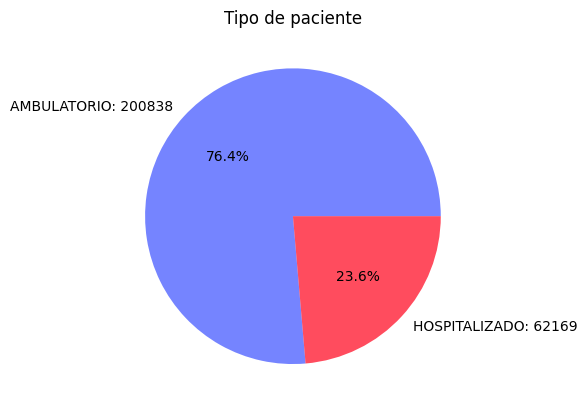

In [511]:
tipo_paciente = {
    1: "AMBULATORIO",
    2: "HOSPITALIZADO",
}
tipo_paciente_value_counts = pd.Series([tipo_paciente[item] for item in df_clean['TIPO_PACIENTE']]).value_counts()

plt.pie(tipo_paciente_value_counts,
        labels = ['AMBULATORIO: ' + str(tipo_paciente_value_counts[0]),
                  'HOSPITALIZADO: ' + str(tipo_paciente_value_counts[1])],
        colors = [(0.1, 0.2, 1, 0.6), (1, 0.0, 0.1, 0.7)],
        autopct='%1.1f%%')
plt.title('Tipo de paciente');

### Entidad

In [559]:
ENTIDAD_NAC = {
    1: 'AGUASCALIENTES',
    2: 'BAJA CALIFORNIA',
    3: 'BAJA CALIFORNIA SUR',
    4: 'CAMPECHE',
    5: 'COAHUILA DE ZARAGOZA',
    6: 'COLIMA',
    7: 'CHIAPAS',
    8: 'CHIHUAHUA',
    9: 'CIUDAD DE MÉXICO',
    10: 'DURANGO',
    11: 'GUANAJUATO',
    12: 'GUERRERO',
    13: 'HIDALGO',
    14: 'JALISCO',
    15: 'MÉXICO',
    16: 'MICHOACÁN DE OCAMPO',
    17: 'MORELOS',
    18: 'NAYARIT',
    19: 'NUEVO LEÓN',
    20: 'OAXACA',
    21: 'PUEBLA',
    22: 'QUERÉTARO',
    23: 'QUINTANA ROO',
    24: 'SAN LUIS POTOSÍ',
    25: 'SINALOA',
    26: 'SONORA',
    27: 'TABASCO',
    28: 'TAMAULIPAS',
    29: 'TLAXCALA',
    30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
    31: 'YUCATÁN',
    32: 'ZACATECAS',
    36: 'ESTADOS UNIDOS MEXICANOS',
    97: 'NO APLICA',
    98: 'SE IGNORA',
    99: 'NO ESPECIFICADO'
}
ENTIDAD_NAC_value_counts = pd.Series([ENTIDAD_NAC[item] for item in df_clean['ENTIDAD_NAC']]).value_counts()
ENTIDAD_NAC_value_counts

CIUDAD DE MÉXICO                   53574
MÉXICO                             31411
JALISCO                            12557
NO ESPECIFICADO                    12541
GUANAJUATO                         12189
VERACRUZ DE IGNACIO DE LA LLAVE    11032
NUEVO LEÓN                         10463
TABASCO                             9589
PUEBLA                              9442
SINALOA                             8680
MICHOACÁN DE OCAMPO                 7760
COAHUILA DE ZARAGOZA                7441
TAMAULIPAS                          7327
GUERRERO                            6004
OAXACA                              5951
BAJA CALIFORNIA                     5274
YUCATÁN                             5203
SAN LUIS POTOSÍ                     5184
SONORA                              4828
CHIAPAS                             4511
HIDALGO                             4082
AGUASCALIENTES                      4067
CHIHUAHUA                           3434
TLAXCALA                            3225
MORELOS         

In [543]:
list(ENTIDAD_NAC.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 36,
 97,
 98,
 99]

In [ ]:
ENTIDAD_NAC_value_counts_NORMALIZADOS_P_POBLACION = 

In [554]:
[(ENTIDAD_NAC_value_counts[ENTIDAD_NAC[entidad]]/datos_poblacion[entidad])*100 for entidad in list(ENTIDAD_NAC.keys())]

[0.28528198865465726,
 0.13993027365203686,
 0.16907822310059403,
 0.15446544078124613,
 0.23646461722190779,
 0.08791467217944984,
 0.08136976832614576,
 0.09177232019613728,
 0.5816973479969042,
 0.1645704307969334,
 0.19765089102623767,
 0.16957170716965786,
 0.1324103318984015,
 0.15041654133951338,
 0.1848530326878729,
 0.16340812062551618,
 0.16013025482876156,
 0.1713537349772068,
 0.18088175142909202,
 0.1440171068412845,
 0.1434239902978425,
 0.081022872600716,
 0.07163674626006131,
 0.18368290604498885,
 0.28675796009373156,
 0.163947786636965,
 0.39910963049165943,
 0.20769700671960903,
 0.24013814086168267,
 0.13682966703334007,
 0.22418046807744244,
 0.14000041919984613]

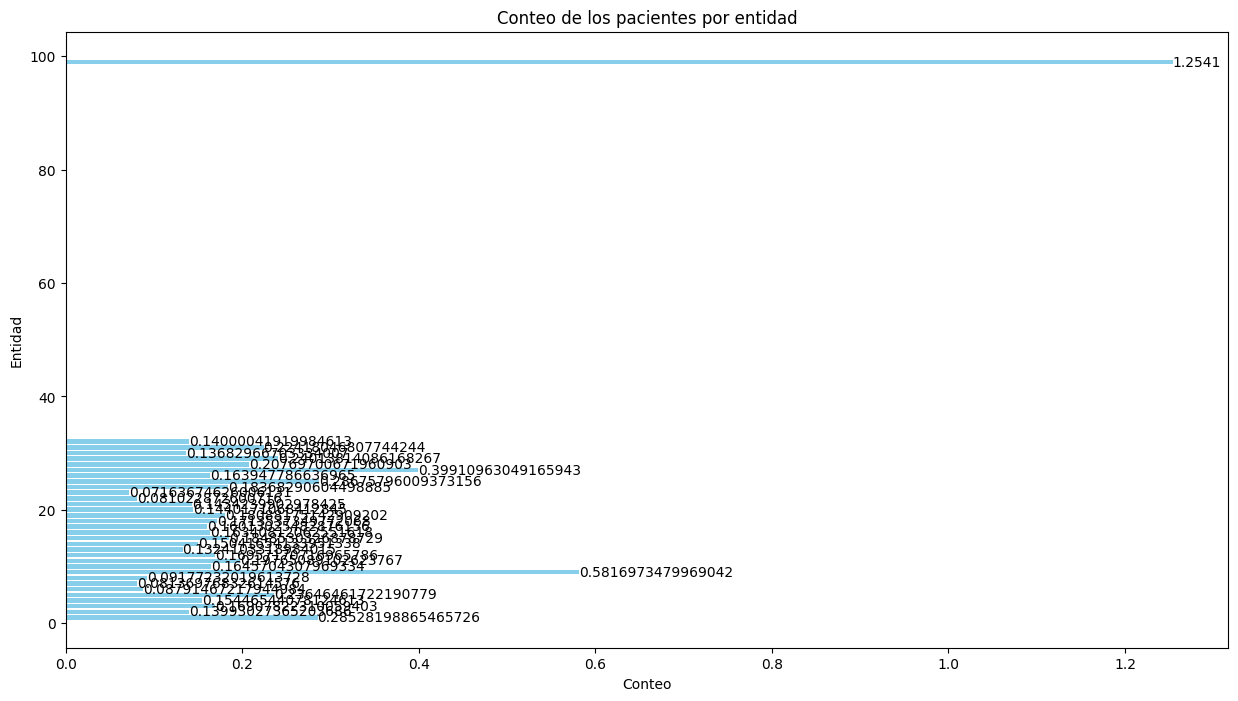

In [558]:
ENTIDAD_NAC = {
    1: 'AGUASCALIENTES',
    2: 'BAJA CALIFORNIA',
    3: 'BAJA CALIFORNIA SUR',
    4: 'CAMPECHE',
    5: 'COAHUILA DE ZARAGOZA',
    6: 'COLIMA',
    7: 'CHIAPAS',
    8: 'CHIHUAHUA',
    9: 'CIUDAD DE MÉXICO',
    10: 'DURANGO',
    11: 'GUANAJUATO',
    12: 'GUERRERO',
    13: 'HIDALGO',
    14: 'JALISCO',
    15: 'MÉXICO',
    16: 'MICHOACÁN DE OCAMPO',
    17: 'MORELOS',
    18: 'NAYARIT',
    19: 'NUEVO LEÓN',
    20: 'OAXACA',
    21: 'PUEBLA',
    22: 'QUERÉTARO',
    23: 'QUINTANA ROO',
    24: 'SAN LUIS POTOSÍ',
    25: 'SINALOA',
    26: 'SONORA',
    27: 'TABASCO',
    28: 'TAMAULIPAS',
    29: 'TLAXCALA',
    30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
    31: 'YUCATÁN',
    32: 'ZACATECAS',
    99:'na'
}


datos_poblacion = {
    1: 1425607,
    2: 3769020,
    3: 798447,
    4: 928363,
    5: 3146771,
    6: 731391,
    7: 5543828,
    8: 3741869,
    9: 9209944,
    10: 1832650,
    11: 6166934,
    12: 3540685,
    13: 3082841,
    14: 8348151,
    15: 16992418,
    16: 4748846,
    17: 1971520,
    18: 1235456,
    19: 5784442,
    20: 4132148,
    21: 6583278,
    22: 2368467,
    23: 1857985,
    24: 2822255,
    25: 3026943,
    26: 2944840,
    27: 2402598,
    28: 3527735,
    29: 1342977,
    30: 8062579,
    31: 2320898,
    32: 1622138,
    99:1000000,
}
ENTIDAD_NAC_value_counts = pd.Series([ENTIDAD_NAC[item] for item in df_clean['ENTIDAD_NAC']]).value_counts()
ENTIDAD_NAC_value_counts_NORMALIZADOS_P_POBLACION = [(ENTIDAD_NAC_value_counts[ENTIDAD_NAC[entidad]]/datos_poblacion[entidad])*100 for entidad in list(ENTIDAD_NAC.keys())]


# Using value_counts
#value_counts = ENTIDAD_NAC_value_counts

# Extracting keys (unique values) and values (counts)
keys = list(ENTIDAD_NAC.keys())
values = ENTIDAD_NAC_value_counts_NORMALIZADOS_P_POBLACION

# Creating the horizontal bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(keys, ENTIDAD_NAC_value_counts_NORMALIZADOS_P_POBLACION, color='skyblue')

# Adding labels next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

# Adding title and labels
plt.title('Conteo de los pacientes por entidad')
plt.xlabel('Conteo')
plt.ylabel('Entidad')

# Display the plot
plt.show()

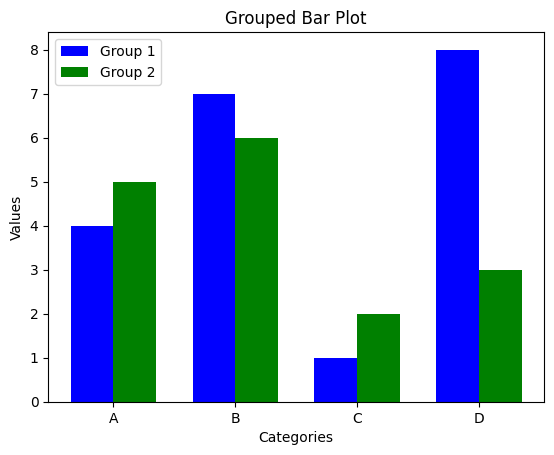

In [437]:

# Sample data
categories = ['A', 'B', 'C', 'D']
values1 = [4, 7, 1, 8]
values2 = [5, 6, 2, 3]

# Define the position of bars
bar_width = 0.35
index = np.arange(len(categories))

# Creating the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, values1, bar_width, label='Group 1', color='blue')
bar2 = ax.bar(index + bar_width, values2, bar_width, label='Group 2', color='green')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, categories)

# Adding legend
plt.legend()

# Display the plot
plt.show()

## Análisis de correlación
Puede proporcionar información sobre posibles predicores importantes para un análisis posterior.

## Análisis de distribución de variables
Examina la distribución de las variables en los datos para detectar sesgos o asimetrías.

## Identificación de valores atípicos
Detectar y analizar outliers y anomalías

## Segmentación
Dividir los datos en segmentos o grupos con características similares para analizar patrones específicos en elgrrupo. 

## Exploración de series temporales
Si los datos tienen una dimensión temporal, realizar un análisis de series temporales para identificar tendencias, estacionalidades, y ciclos en los datos a lo largo del tiempo.

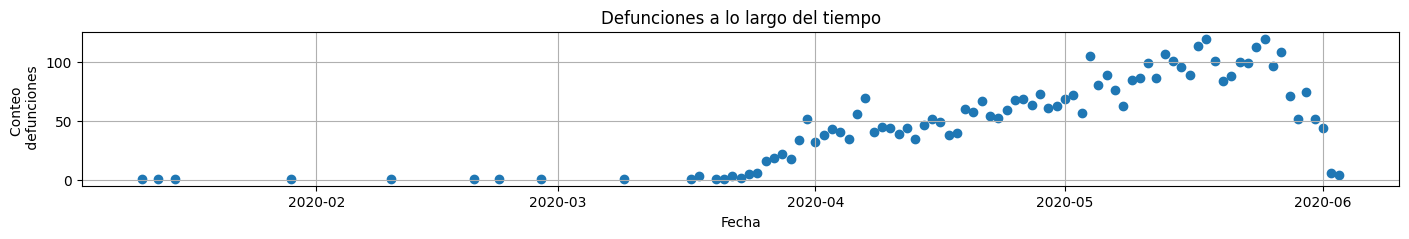

In [85]:
plt.figure(figsize=(17,2))
fechas_defunciones = list(dict(fecha_def.value_counts()).keys())
conteo_defunciones = list(dict(fecha_def.value_counts()).values())
plt.scatter(fechas_defunciones, conteo_defunciones)
plt.grid()
plt.title('Defunciones a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Conteo \n defunciones')
plt.show()

# Modelado de datos